<a href="https://colab.research.google.com/github/Slim205/ABM-prediction/blob/main/partie_1_calibration_of_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
N = 1000
def gen_return(params) :
  segma,alpha,beta,gamma,lambda1,k1 = params[0],params[1],params[2],params[3],params[4],params[5]
  P = np.zeros(N)
  m = np.zeros(N)
  V= np.zeros(N)
  epsilon = np.random.normal(0, segma, N )
  P[0] = epsilon[0]
  for t in range(1,N) :
    P[t] = P[t-1] + k1* (V[t-1] - P[t-1]) + beta *(np.tanh(gamma * m[t-1])) + epsilon[t]
    m[ t] = (1-alpha)*m[t-1] + alpha *(P[t] - P[t-1])
    V[t] = (1-lambda1) *V[t-1] + lambda1 * P[t]
  Returns = np.diff(P)
  return Returns
from scipy.optimize import minimize
params_real = [0.043,0.1,0.015,36.7,0.25,0.015]
returns_real = gen_return(params_real)

In [ ]:
K  = 6

In [ ]:
def moments(V) :
  L=[]

  L.append(np.mean(V))
  L.append(np.mean(V**2))
  L.append(np.mean(V**3))
  L.append(np.mean(V[1:]*V[:-1]))# 1st lag autocorrelation of r
  L.append(np.mean((V[1:]**2)*(V[:-1]**2)))# 1st lag autocorrelation of r**2
  L.append(np.mean((V[2:]**2)*(V[:-2]**2)))# 2nd lag autocorrelation of r**2


  L.append
  a = np.array(L)

  return a

In [ ]:
W2 = np.diag(moments(returns_real))
W2 = np.linalg.inv(W2)

In [ ]:
def f (params) :
  returns = (moments(gen_return(params))- moments(returns_real))
  return returns.T @ W2@ W2@returns
#bounds = [(0.0001,0.1),(0.01,0.3),(0,0.1),(10,50),(0.01,.3),(-0.1,0.1)]
bounds = [(0.01,0.08),(0.05,0.3),(0,0.03),(27,47),(0.1,0.4),(0,0.03)]

#bounds = [(0,2)]*6
params0 = minimize(f,params_real , method='Powell',bounds= bounds).x
params0

array([4.86152068e-02, 1.00406531e-01, 1.84135252e-02, 3.50092087e+01,
       2.85410197e-01, 2.29179607e-02])

In [ ]:
params_real

[0.043, 0.1, 0.015, 36.7, 0.25, 0.015]

# Simulation

In [ ]:
def process(params0):
  N = 1000
  T = 100
  segma,alpha,beta,gamma,lambda1,k1 = params0[0],params0[1],params0[2],params0[3],params0[4],params0[5]
  P = np.zeros((N,T))
  m = np.zeros((N,T))
  V= np.zeros((N,T))
  Returns = np.zeros((N-1,T))
  epsilon = np.random.normal(0, segma, (N,T))
  P[0,:] = epsilon[0,:]
  for t in range(1,N) :
    P[t,:] = P[t-1,:] + k1* (V[t-1,:] - P[t-1,:]) + beta *(np.tanh(gamma * m[t-1,:])) + epsilon[t,:]
    m[ t,:] = (1-alpha)*m[t-1,:] + alpha *(P[t,:] - P[t-1,:])
    V[t,:] = (1-lambda1) *V[t-1,:] + lambda1 * P[t,:]
    Returns[t-1,:] = P[t,:] - P[t-1,:]
    Returns = Returns
  X = np.zeros((6,T))
  for i in range(T):
    X[:,i] = moments(Returns[:,i])
  d = np.cov(X)
  W = np.linalg.inv(d)
  def fw(params) :
    x = (moments(gen_return(params))- moments(returns_real))

    return x.T @W2@ W@W2 @ x

  params1 = minimize(f,params0, method='Powell',bounds= bounds).x
  return params1

In [ ]:
def diff(x,y) :
  x = [abs(x[i]-y[i])/bounds[i][1] for i in range(6)]
 # return(max(abs(x[0]-y[0]),abs(x[1]-y[1])/10,abs(x[2]-y[2]),abs(x[4]-y[4])/10,abs(x[5]-y[5]),abs(x[3]-y[3])/1000 ))
  return max(x)

In [ ]:
n = 1
def iter(params0) :
  for i in range(n) :
    print('{}\{}'.format(i+1,n))
    params1 =process(params0)

    print(diff(params1,params_real))
    if diff(params1,params0) <.1:
      break
    params0 = params1
  return(params1)

In [ ]:
liste=[]

In [ ]:
M = 500
for j in range(M) :
  print('{}\{}j'.format(j+1,M))

  params0 = minimize(f,params_real , method='Powell',bounds= bounds).x
  params1 = iter(params0)
  liste.append(params1)
segma,alpha,beta,gamma,lambda1,k1 = [x[0]for x in liste], [x[1]for x in liste],[x[2]for x in liste],[x[3]for x in liste],[x[4]for x in liste],[x[5]for x in liste]


1\500j
1\1
0.16933511260971035
2\500j
1\1
0.46994335208350857
3\500j
1\1
0.1768311478343156
4\500j
1\1
0.3552130843637035
5\500j
1\1
0.3511681980542314
6\500j
1\1
0.35155373122657774
7\500j
1\1
0.545084971874737
8\500j
1\1
0.20820393249936903
9\500j
1\1
0.3646847424263903
10\500j
1\1
0.47095752125332735
11\500j
1\1
0.24140550545973044
12\500j
1\1
0.46490116338439214
13\500j
1\1
0.19041985079285312
14\500j
1\1
0.38599930888578077
15\500j
1\1
0.20976989667407586
16\500j
1\1
0.15163834270842086
17\500j
1\1
0.43986174928050564
18\500j
1\1
0.348361657291579
19\500j
1\1
0.28767967907070946
20\500j
1\1
0.3541019662496846
21\500j
1\1
0.24264578624800215
22\500j
1\1
0.398646918373635
23\500j
1\1
0.24371471439721953
24\500j
1\1
0.2738470116105427
25\500j
1\1
0.5242196952827636
26\500j
1\1
0.348361657291579
27\500j
1\1
0.46994335208350846
28\500j
1\1
0.4117395642202654
29\500j
1\1
0.46994335208350846
30\500j
1\1
0.15868886058272103
31\500j
1\1
0.32775078057142965
32\500j
1\1
0.21240409285258258
3

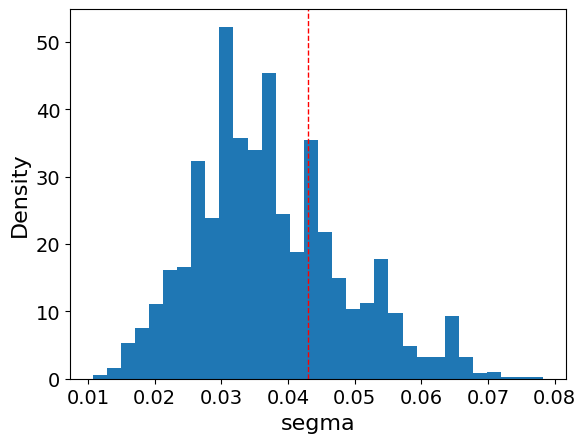

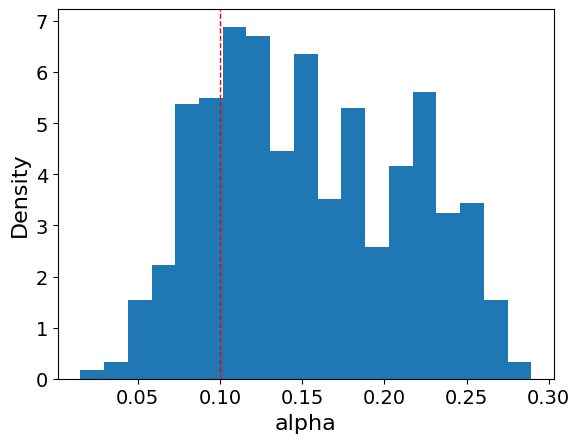

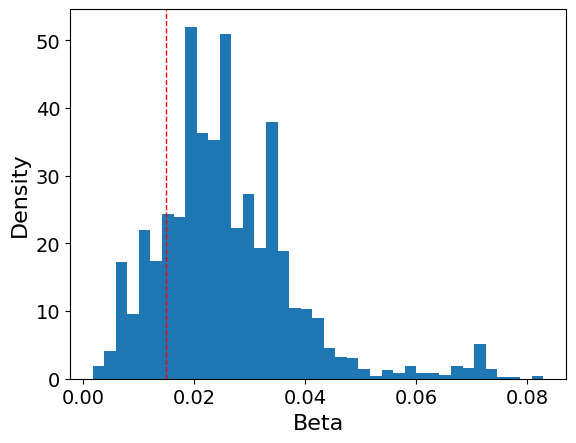

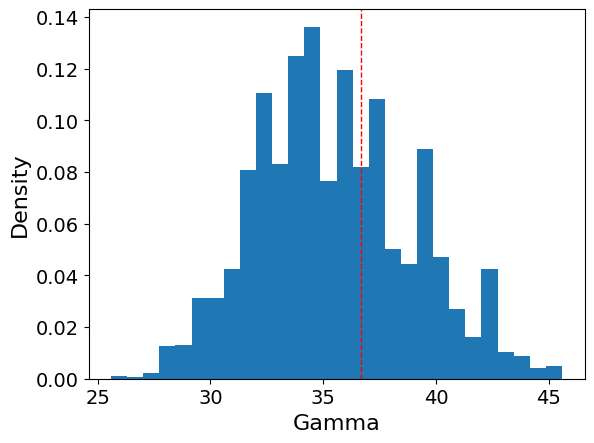

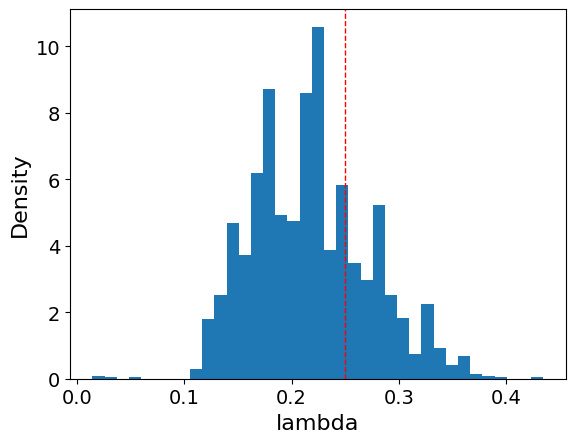

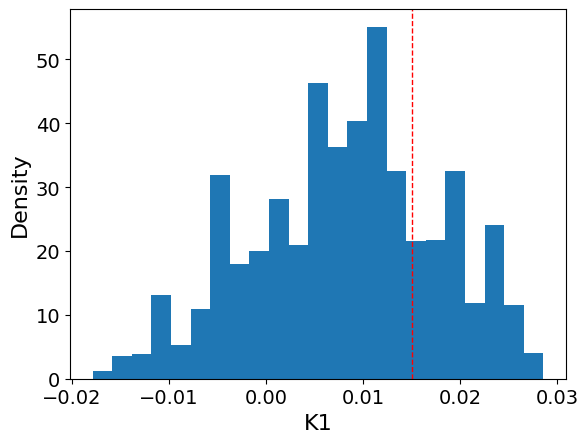

In [ ]:
liste4 = {'segma':segma,'alpha':alpha,'Beta':beta,'Gamma':gamma,'lambda':lambda1,'K1':k1}
i= 0
for x,y in liste4.items() :

  plt.hist(y,bins='auto',density=True)
  plt.xlabel(x,fontsize=16)
  plt.ylabel('Density',fontsize=16)
  plt.tick_params(labelsize=14)
  plt.axvline(x=params_real[i], color='red', linestyle='--', linewidth=1)
  i+=1
  plt.show()

In [ ]:
bounds = [(0.01,0.08),(0.05,0.15),(0,0.3),(27,47),(0.1,0.4),(0,0.03)]


# suite

In [ ]:
params0

array([ 4.43769410e-02,  1.94516115e-01,  2.58048651e-02,  3.14320012e+01,
        1.76393202e-01, -4.50634856e-03])

In [ ]:
params_real

[0.043, 0.1, 0.015, 36.7, 0.25, 0.015]

In [ ]:
params1 = iter(params0)
r = (gen_return(params_real)-gen_return(params1))**2

0\100
0.19773502558932746
1\100
0.6436519154054392
2\100
0.7847812182235178
3\100
0.5044674723053695
4\100
1.1576954720776984
5\100
0.41856978543051504
6\100
0.40147614305642754
7\100
0.9958021439676131
8\100
0.9847598395752345
9\100
0.7434074985945943
10\100
0.9317839217667705
11\100
0.4405742341643001
12\100
0.9124640118070199
13\100
1.29645683306331
14\100
1.1664078649987382
15\100
0.7054211748824878
16\100
0.5094747040548552
17\100
0.5091578529889293
18\100
0.4058448262866044
19\100
0.331054207066488
20\100
0.39621204089596984
21\100
0.9860679774997898
22\100
1.094601470563541
23\100
0.381218128838648
24\100
0.9808841468016971
25\100
1.0063557932479843
26\100
0.5586658077756934
27\100
0.35220848133444915
28\100
1.1219767357394153
29\100
0.8440391574499095
30\100
0.5139320225002104
31\100
1.0171958496111997
32\100
1.1664078649987382
33\100
1.1664078649987382
34\100
0.5076384521218542
35\100
0.61384630595204
36\100
0.8212464573302495
37\100
0.5962949825609992
38\100
1.207134013067976

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

#ARIMA is a more general model that include ARMA as a special case (AR-I-MA).
#It has 3 parameters. To obtain an ARMA is enough to set the central parameter to zero.
from statsmodels.tsa.arima.model import ARIMA


from statsmodels.stats.diagnostic import acorr_ljungbox


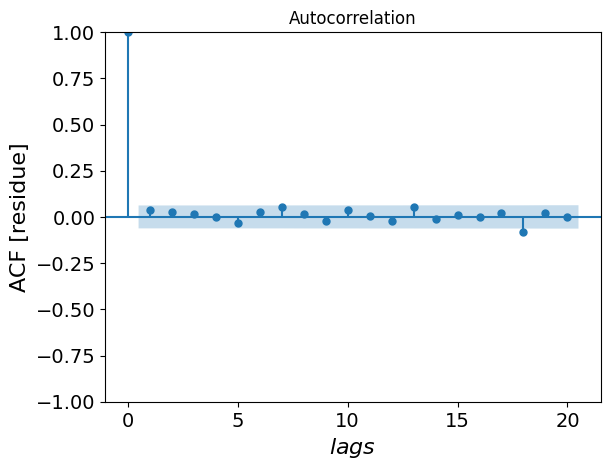

In [ ]:
sm.graphics.tsa.plot_acf(r, lags=20)
plt.xlabel(r'$lags$',fontsize=16)
plt.ylabel('ACF [residue]',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()